In [90]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [128]:
import os
os.chdir("C:\\Users\\Amit.Jain\\Desktop\\PGP-DSBA\\week13_Decision_Tree_CART")

In [129]:
credit_df = pd.read_csv("credit.csv")

In [130]:
credit_df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


In [131]:
credit_df.shape

(1000, 17)

In [132]:
credit_df.info()  # many columns are of type object i.e. strings. These need to be converted to ordinal type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

In [133]:
credit_df.columns

Index(['checking_balance', 'months_loan_duration', 'credit_history', 'purpose',
       'amount', 'savings_balance', 'employment_duration', 'percent_of_income',
       'years_at_residence', 'age', 'other_credit', 'housing',
       'existing_loans_count', 'job', 'dependents', 'phone', 'default'],
      dtype='object')

In [134]:
pd.Categorical(credit_df["age"]).codes

array([48,  3, 30, 26, 34, 16, 34, 16, 42,  9,  6,  5,  3, 41,  9, 13, 34,
        6, 25, 12, 29, 25, 29, 25,  7, 17, 20, 23, 15, 44, 17,  8, 11, 38,
       14,  6, 12, 18, 18,  5, 11,  7, 25,  5, 39, 16, 20,  4, 20,  9, 10,
       11,  6, 12, 38,  7, 33, 12,  4,  4,  8, 31, 42,  6,  7, 29, 10,  3,
       18,  6, 11, 27, 32, 22, 21, 47, 15, 32, 20,  3, 25, 28,  5, 39, 33,
       10,  8, 28, 11,  9, 37, 35, 14,  1, 35, 39, 42, 15, 17, 17, 22,  5,
        5, 16,  7, 20, 20, 13, 11, 16, 12,  4,  9,  6, 16, 28, 11,  8,  4,
       17,  6, 22,  5, 44,  8, 11, 21, 11, 15, 10,  5, 10,  8, 28,  2, 19,
        8, 47, 16, 25,  8, 11,  8,  3,  4, 11, 20, 32,  9, 27, 23, 19,  5,
       10, 17,  1, 29, 26, 19, 15, 17, 11, 17, 50, 17, 13, 14,  1,  6, 12,
       14,  7, 15, 14,  7, 34, 23, 33, 12, 46,  9, 11, 21, 31, 17, 12, 51,
       49,  1, 14, 35, 15, 17, 10,  2, 15,  9,  8, 17, 21, 33,  8,  7,  2,
       19, 19, 24,  7,  2, 36, 14, 26, 31, 47, 32, 20, 12,  4,  5, 45,  7,
        4, 11, 13, 11,  8

In [135]:
pd.Categorical(credit_df[feature])

['no', 'yes', 'no', 'no', 'yes', ..., 'no', 'no', 'no', 'yes', 'no']
Length: 1000
Categories (2, object): ['no', 'yes']

In [136]:
# Decision tree in Python can take only numerical / categorical colums. It cannot take string / obeject types. 
# The following code loops through each column and checks if the column type is object then converts those columns
# into categorical with each distinct value becoming a category or code.
for feature in credit_df.columns: 
    if credit_df[feature].dtype == 'object': 
        credit_df[feature] = pd.Categorical(credit_df[feature]).codes

In [137]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   checking_balance      1000 non-null   int8 
 1   months_loan_duration  1000 non-null   int64
 2   credit_history        1000 non-null   int8 
 3   purpose               1000 non-null   int8 
 4   amount                1000 non-null   int64
 5   savings_balance       1000 non-null   int8 
 6   employment_duration   1000 non-null   int8 
 7   percent_of_income     1000 non-null   int64
 8   years_at_residence    1000 non-null   int64
 9   age                   1000 non-null   int64
 10  other_credit          1000 non-null   int8 
 11  housing               1000 non-null   int8 
 12  existing_loans_count  1000 non-null   int64
 13  job                   1000 non-null   int8 
 14  dependents            1000 non-null   int64
 15  phone                 1000 non-null   int8 
 16  default

In [138]:
# capture the target column ("default") into separate vectors for training set and test set
X = credit_df.drop("default" , axis=1)
y = credit_df.pop("default")

In [139]:
X.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone
0,1,6,0,4,1169,4,3,4,4,67,1,1,2,1,1,1
1,0,48,1,4,5951,2,0,2,2,22,1,1,1,1,1,0
2,3,12,0,3,2096,2,1,2,3,49,1,1,1,3,2,0
3,1,42,1,4,7882,2,1,2,4,45,1,0,1,1,2,0
4,1,24,3,1,4870,2,0,3,4,53,1,0,2,1,2,0


In [140]:
y.head()

0    0
1    1
2    0
3    0
4    1
Name: default, dtype: int8

In [141]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
checking_balance,1000.0,1.582,1.253334,0.0,0.0,1.0,3.00,3.0
months_loan_duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
credit_history,1000.0,1.070,1.059350,0.0,0.0,1.0,1.00,4.0
purpose,1000.0,2.540,1.607789,0.0,1.0,3.0,4.00,5.0
amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
savings_balance,1000.0,2.145,1.111400,0.0,2.0,2.0,2.00,4.0
employment_duration,1000.0,1.525,1.344315,0.0,0.0,1.0,3.00,4.0
percent_of_income,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
years_at_residence,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0


In [142]:
y.describe()

count    1000.000000
mean        0.300000
std         0.458487
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: default, dtype: float64

In [181]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)


In [148]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 970 entries, 910 to 37
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   checking_balance      970 non-null    int8 
 1   months_loan_duration  970 non-null    int64
 2   credit_history        970 non-null    int8 
 3   purpose               970 non-null    int8 
 4   amount                970 non-null    int64
 5   savings_balance       970 non-null    int8 
 6   employment_duration   970 non-null    int8 
 7   percent_of_income     970 non-null    int64
 8   years_at_residence    970 non-null    int64
 9   age                   970 non-null    int64
 10  other_credit          970 non-null    int8 
 11  housing               970 non-null    int8 
 12  existing_loans_count  970 non-null    int64
 13  job                   970 non-null    int8 
 14  dependents            970 non-null    int64
 15  phone                 970 non-null    int8 
dtypes: int6

In [182]:
train_labels.count()

700

In [149]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   checking_balance      1000 non-null   int8 
 1   months_loan_duration  1000 non-null   int64
 2   credit_history        1000 non-null   int8 
 3   purpose               1000 non-null   int8 
 4   amount                1000 non-null   int64
 5   savings_balance       1000 non-null   int8 
 6   employment_duration   1000 non-null   int8 
 7   percent_of_income     1000 non-null   int64
 8   years_at_residence    1000 non-null   int64
 9   age                   1000 non-null   int64
 10  other_credit          1000 non-null   int8 
 11  housing               1000 non-null   int8 
 12  existing_loans_count  1000 non-null   int64
 13  job                   1000 non-null   int8 
 14  dependents            1000 non-null   int64
 15  phone                 1000 non-null   int8 
dtypes: int6

In [150]:
dt_model = DecisionTreeClassifier(criterion = 'gini' )

In [151]:
dt_model.fit(X_train, train_labels)

DecisionTreeClassifier()

In [152]:
from sklearn import tree

train_char_label = ['No', 'Yes']  ## this is the Labels for for any decision Node
Credit_Tree_File = open('C:\\Users\\Amit.Jain\\Desktop\\PGP-DSBA\\week13_Decision_Tree_CART\\credit_tree.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=Credit_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))

Credit_Tree_File.close()


In [153]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))


                           Imp
checking_balance      0.143026
months_loan_duration  0.108025
credit_history        0.056580
purpose               0.052034
amount                0.206183
savings_balance       0.036204
employment_duration   0.040659
percent_of_income     0.052178
years_at_residence    0.054678
age                   0.100295
other_credit          0.025990
housing               0.027960
existing_loans_count  0.031342
job                   0.040725
dependents            0.017235
phone                 0.006886


In [156]:
y_predict = dt_model.predict(X_test)
y_predict

array([1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1], dtype=int8)

#                                      Regularising the Decision Tree

In [157]:

reg_dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 7,min_samples_leaf=10,min_samples_split=30)
reg_dt_model.fit(X_train, train_labels)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=10, min_samples_split=30)

In [159]:
credit_tree_regularized = open('C:\\Users\\Amit.Jain\\Desktop\\PGP-DSBA\\week13_Decision_Tree_CART\\credit_tree_regularized.dot','w')
dot_data = tree.export_graphviz(reg_dt_model, out_file= credit_tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

credit_tree_regularized.close()

print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))


                           Imp
checking_balance      0.143026
months_loan_duration  0.108025
credit_history        0.056580
purpose               0.052034
amount                0.206183
savings_balance       0.036204
employment_duration   0.040659
percent_of_income     0.052178
years_at_residence    0.054678
age                   0.100295
other_credit          0.025990
housing               0.027960
existing_loans_count  0.031342
job                   0.040725
dependents            0.017235
phone                 0.006886


In [160]:
ytrain_predict = reg_dt_model.predict(X_train)
ytest_predict = reg_dt_model.predict(X_test)

In [161]:
import matplotlib.pyplot as plt

AUC: 0.855


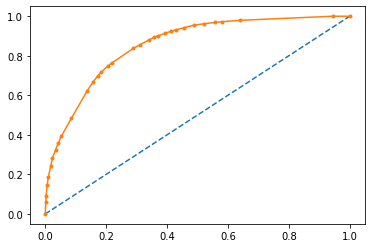

In [172]:
# AUC and ROC for the training data

# predict probabilities
probs = reg_dt_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.780


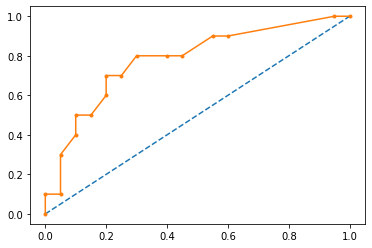

In [171]:
# AUC and ROC for the test data


# predict probabilities
probs = reg_dt_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [174]:
from sklearn.metrics import classification_report,confusion_matrix

In [176]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       680
           1       0.66      0.62      0.64       290

    accuracy                           0.79       970
   macro avg       0.75      0.74      0.75       970
weighted avg       0.79      0.79      0.79       970



In [175]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        20
           1       0.60      0.60      0.60        10

    accuracy                           0.73        30
   macro avg       0.70      0.70      0.70        30
weighted avg       0.73      0.73      0.73        30



In [177]:
confusion_matrix(train_labels, ytrain_predict)

array([[586,  94],
       [109, 181]], dtype=int64)

In [178]:
confusion_matrix(test_labels, ytest_predict)

array([[16,  4],
       [ 4,  6]], dtype=int64)

In [179]:
reg_dt_model.score(X_train,train_labels)

0.790721649484536

In [180]:
reg_dt_model.score(X_test,test_labels)

0.7333333333333333